# macs default output results are better

In [9]:
## loading packages
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene
library(clusterProfiler)

Loading required package: GenomicFeatures
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading 

In [31]:
peakFile_ct1.0d8 = "./macs_out_nomodel/CT1.0-D8-SOX1_peaks.narrowPeak"
peakFile_ct1.0d4 = "./macs_out_nomodel/CT1.0-D4-SOX1_peaks.narrowPeak"
peakFile_iwp2d8 = "./macs_out_nomodel/IWP2-D8-SOX1_peaks.narrowPeak"

peak_ct1.0d8 <- readPeakFile(peakFile_ct1.0d8,header=0)
peak_ct1.0d4 <- readPeakFile(peakFile_ct1.0d4,header=0)
peak_iwp2 <- readPeakFile(peakFile_iwp2d8,header=0)
peak_ct1.0d8

GRanges object with 3608 ranges and 7 metadata columns:
         seqnames                 ranges strand |                      V4
            <Rle>              <IRanges>  <Rle> |                <factor>
     [1]     chr1     [ 935538,  935740]      * |    CT1.0-D8-SOX1_peak_1
     [2]     chr1     [1295610, 1295816]      * |    CT1.0-D8-SOX1_peak_2
     [3]     chr1     [1368422, 1368791]      * |    CT1.0-D8-SOX1_peak_3
     [4]     chr1     [2179699, 2180057]      * |    CT1.0-D8-SOX1_peak_4
     [5]     chr1     [2202685, 2203199]      * |    CT1.0-D8-SOX1_peak_5
     ...      ...                    ...    ... .                     ...
  [3604]     chrX [147946870, 147947258]      * | CT1.0-D8-SOX1_peak_3604
  [3605]     chrX [149735289, 149735505]      * | CT1.0-D8-SOX1_peak_3605
  [3606]     chrX [152949826, 152950183]      * | CT1.0-D8-SOX1_peak_3606
  [3607]     chrX [153237080, 153237399]      * | CT1.0-D8-SOX1_peak_3607
  [3608]     chrX [154028039, 154028384]      * | CT1.0-

In [3]:
library(ggplot2)

In [32]:
options(repr.plot.width=6, repr.plot.height=8)
par(ps = 8, cex.axis = 0.2)
chrp = covplot(peak_ct1.0d8, weightCol="V5")
#axis(2,cex.axis=0.2)

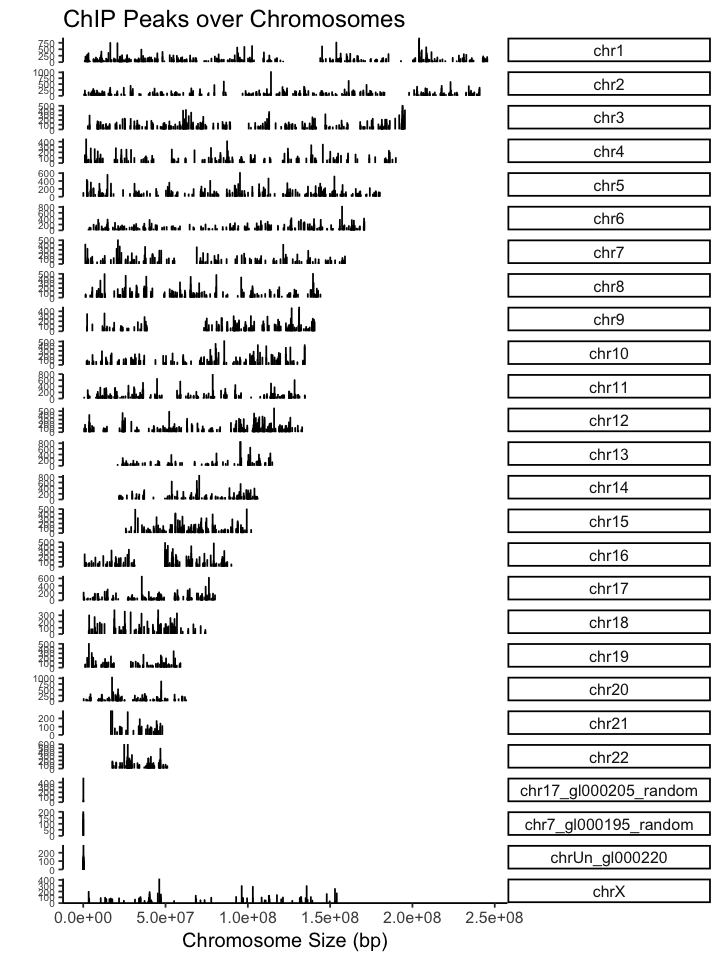

In [33]:
chrp = chrp+theme(text = element_text(size=12), axis.text.y  = element_text(size=6))
print(chrp)

In [34]:
peakBoth = GenomicRanges::GRangesList(D8=readPeakFile(peakFile_ct1.0d8, header=0),
                                      D4=readPeakFile(peakFile_ct1.0d4,header=0),
                                      IWP2=readPeakFile(peakFile_iwp2d8,header=0))


chr17_gl000205_random dosen't contain signal higher than 1
chr7_gl000195_random dosen't contain signal higher than 1
Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

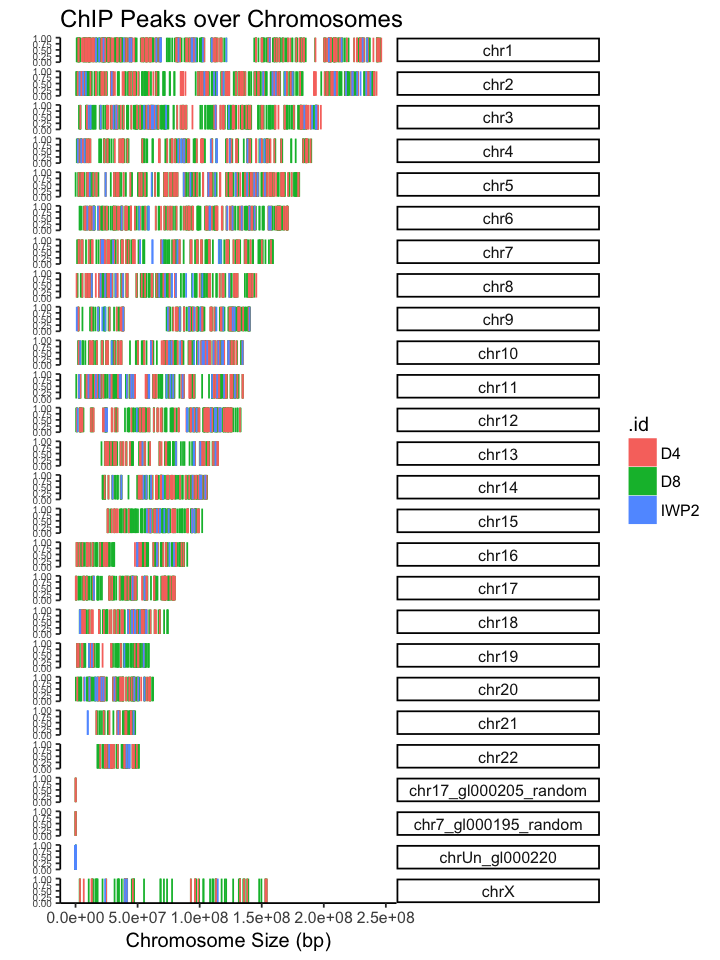

In [35]:
p = covplot(peakBoth)
p = p+theme(text = element_text(size=12), axis.text.y  = element_text(size=6))
print(p)

In [36]:
pdf("./chipseeker_out/SOX1.peaks.distributions.over.chromosomes.pdf",
    width = 6, height = 8,)
print(p)
dev.off()
png("./chipseeker_out/SOX1.peaks.distributions.over.chromosomes.png",
    width = 6, height = 8, units = 'in', res = 600)
print(p)
dev.off()

pdf 
  2

pdf 
  2

In [37]:
peakAnno_ct1.0d8 <- annotatePeak(peakFile_ct1.0d8, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Hs.eg.db")
peakAnno_ct1.0d4 <- annotatePeak(peakFile_ct1.0d4, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Hs.eg.db")
peakAnno_iwp2d8 <- annotatePeak(peakFile_iwp2d8, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Hs.eg.db")

>> loading peak file...				 2017-08-17 09:56:41 
>> preparing features information...		 2017-08-17 09:56:41 
>> identifying nearest features...		 2017-08-17 09:56:41 
>> calculating distance from peak to TSS...	 2017-08-17 09:56:42 
>> assigning genomic annotation...		 2017-08-17 09:56:42 
>> adding gene annotation...			 2017-08-17 09:56:44 


'select()' returned 1:many mapping between keys and columns


>> assigning chromosome lengths			 2017-08-17 09:56:44 
>> done...					 2017-08-17 09:56:44 
>> loading peak file...				 2017-08-17 09:56:44 
>> preparing features information...		 2017-08-17 09:56:44 
>> identifying nearest features...		 2017-08-17 09:56:44 
>> calculating distance from peak to TSS...	 2017-08-17 09:56:44 
>> assigning genomic annotation...		 2017-08-17 09:56:44 
>> adding gene annotation...			 2017-08-17 09:56:46 


'select()' returned 1:many mapping between keys and columns


>> assigning chromosome lengths			 2017-08-17 09:56:46 
>> done...					 2017-08-17 09:56:46 
>> loading peak file...				 2017-08-17 09:56:46 
>> preparing features information...		 2017-08-17 09:56:46 
>> identifying nearest features...		 2017-08-17 09:56:46 
>> calculating distance from peak to TSS...	 2017-08-17 09:56:46 
>> assigning genomic annotation...		 2017-08-17 09:56:46 
>> adding gene annotation...			 2017-08-17 09:56:48 


'select()' returned 1:many mapping between keys and columns


>> assigning chromosome lengths			 2017-08-17 09:56:49 
>> done...					 2017-08-17 09:56:49 


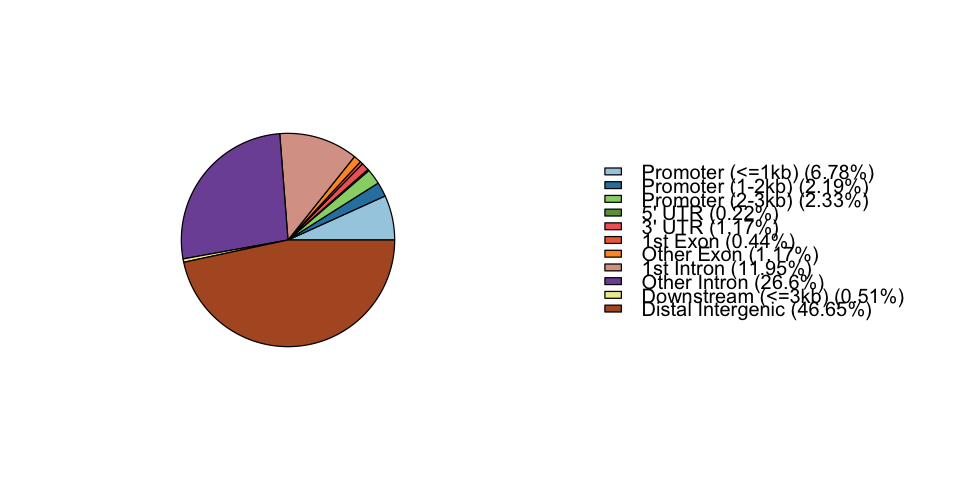

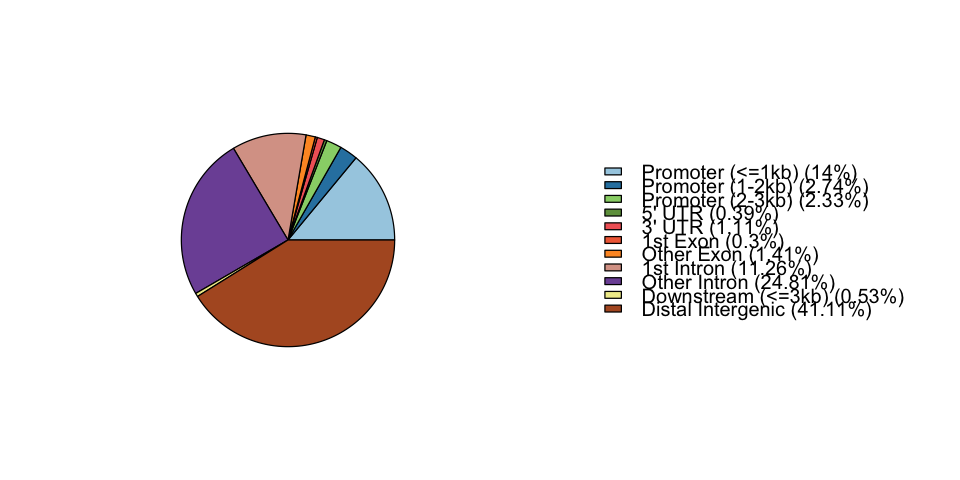

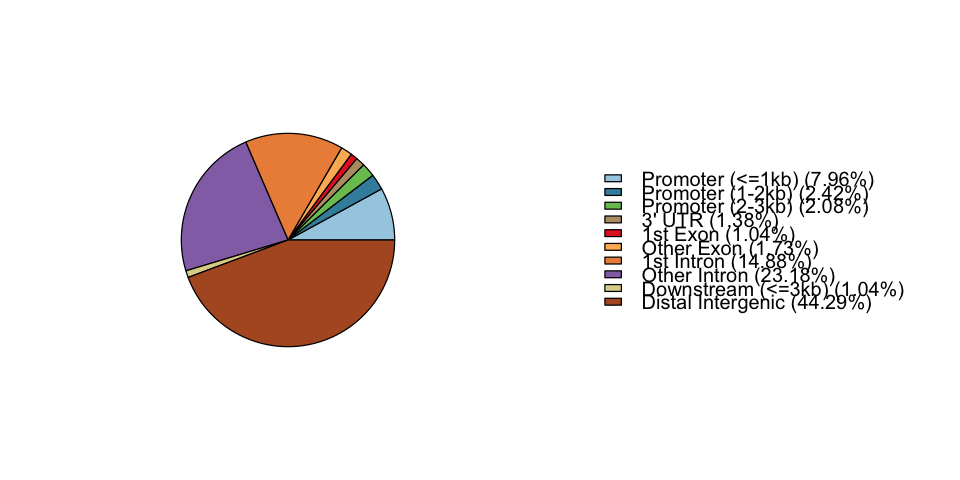

In [38]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,3))
plotAnnoPie(peakAnno_ct1.0d4)
plotAnnoPie(peakAnno_ct1.0d8)
plotAnnoPie(peakAnno_iwp2d8)

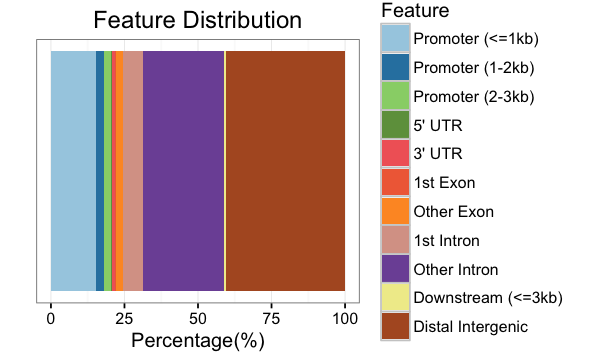

In [36]:
options(repr.plot.width=5, repr.plot.height=3)
par(ps = 4, cex = .1, cex.main = .1)
plotAnnoBar(peakAnno)

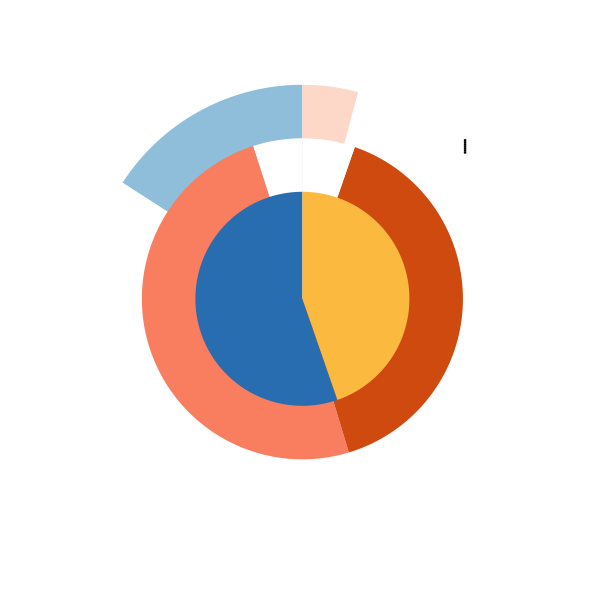

In [42]:
options(repr.plot.width=5, repr.plot.height=5)
par(ps = 1, cex = .1, cex.main = .1)
vennpie(peakAnno)

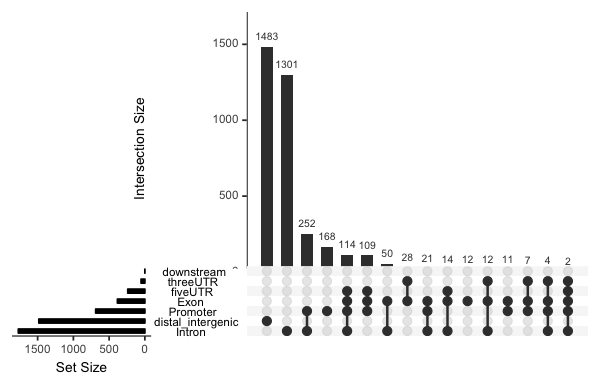

In [39]:
options(repr.plot.width=5, repr.plot.height=3.2)
upsetplot(peakAnno_ct1.0d8)

In [42]:
pdf("chipseeker_out/SOX1-CT1.0-D8.upset.vennpie.pdf", width = 5, height = 3.2)
p = upsetplot(peakAnno_ct1.0d8)
dev.off()

pdf 
  2

In [43]:
pdf("chipseeker_out/SOX1-CT1.0-D4.upset.vennpie.pdf", width = 5, height = 3.2)
p = upsetplot(peakAnno_ct1.0d4)
print(p)
dev.off()
pdf("chipseeker_out/SOX1-IWP2-D8.upset.vennpie.pdf", width = 5, height = 3.2)
p = upsetplot(peakAnno_iwp2d8)
print(p)
dev.off()

NULL


pdf 
  2

NULL


pdf 
  2

In [44]:
SOX1_cd4 = c(peakFile_ct1.0d4)
SOX1_cd8 = c(peakFile_ct1.0d8)
SOX1_id8 = c(peakFile_iwp2d8)
files = list(SOX1_Day4_CT1.0=SOX1_cd4,SOX1_Day8_CT1.0=SOX1_cd8, SOX1_Day8_IWP2=SOX1_id8)
files

$SOX1_Day4_CT1.0
[1] "./macs_out_nomodel/CT1.0-D4-SOX1_peaks.narrowPeak"

$SOX1_Day8_CT1.0
[1] "./macs_out_nomodel/CT1.0-D8-SOX1_peaks.narrowPeak"

$SOX1_Day8_IWP2
[1] "./macs_out_nomodel/IWP2-D8-SOX1_peaks.narrowPeak"

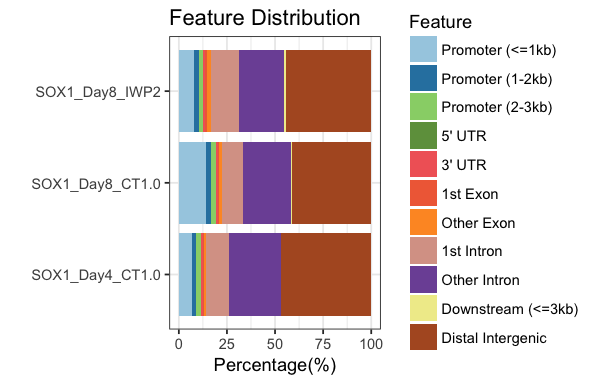

In [45]:
peakAnnoList <- lapply(files, annotatePeak, TxDb=txdb,
                       tssRegion=c(-3000, 3000), verbose=FALSE)
plotAnnoBar(peakAnnoList)

In [46]:
pdf("./chipseeker_out/feature.distribution.pdf", width = 5, height = 5)
p = plotAnnoBar(peakAnnoList)
print(p)
dev.off()
png("./chipseeker_out/feature.distribution.png", width = 5, height = 5, units = 'in', res = 600)
print(p)
dev.off()

pdf 
  2

pdf 
  2

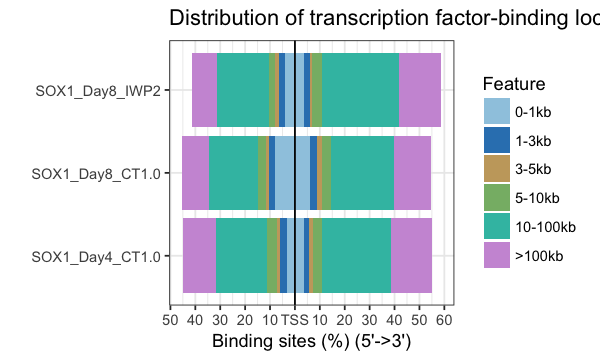

In [47]:
options(repr.plot.width=5, repr.plot.height=3)
plotDistToTSS(peakAnnoList)

In [48]:
pdf("./chipseeker_out/distribution.of.transcription.factor.binding.location.pdf", width = 5, height = 3)
p = plotDistToTSS(peakAnnoList)
print(p)
dev.off()
png("./chipseeker_out/distribution.of.transcription.factor.binding.location.png",
    width = 5, height = 3, units = 'in', res = 600)
print(p)
dev.off()

pdf 
  2

pdf 
  2

In [49]:
genes = lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)
names(genes) = gsub("_", "\n", names(genes))
compKEGG <- compareCluster(geneCluster   = genes,
                         fun           = "enrichKEGG",
                         pvalueCutoff  = 0.05,
                         pAdjustMethod = "BH",)

p = plot(compKEGG, showCategory = 12, title = "KEGG Pathway Enrichment Analysis")

In [50]:
options(repr.plot.width=7.5, repr.plot.height=5)
p = plot(compKEGG, showCategory = 12, title = "KEGG Pathway Enrichment Analysis")

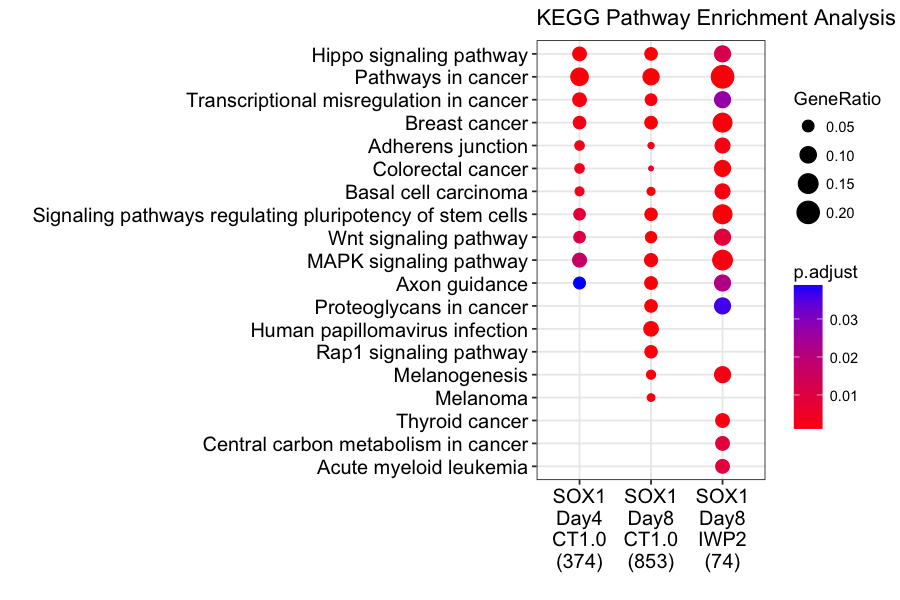

In [51]:
print(p)

In [52]:
pdf("./chipseeker_out/KEGG.enrichment.analysis.pdf", width = 7.5, height = 5)
print(p)
dev.off()
png("./chipseeker_out/KEGG.enrichment.analysis.png",
    width = 7.5, height = 5, units = 'in', res = 600)
print(p)
dev.off()

pdf 
  2

pdf 
  2

In [53]:
kegg = as.data.frame(compKEGG)

In [54]:
write.csv(kegg, file="./chipseeker_out/KEGG.enrichment.analysis.csv")

In [55]:
genes = lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)
names(genes) = gsub("_", "\n", names(genes))
compBP <- compareCluster(geneCluster   = genes,
                         fun           = "enrichGO",
                         pvalueCutoff  = 0.05,
                         pAdjustMethod = "BH",
                         ont="BP",
                         OrgDb='org.Hs.eg.db',
                         readable = TRUE)

In [56]:
BP = as.data.frame(compBP)
write.csv(BP, file="./chipseeker_out/GeneOntology.BP.csv")

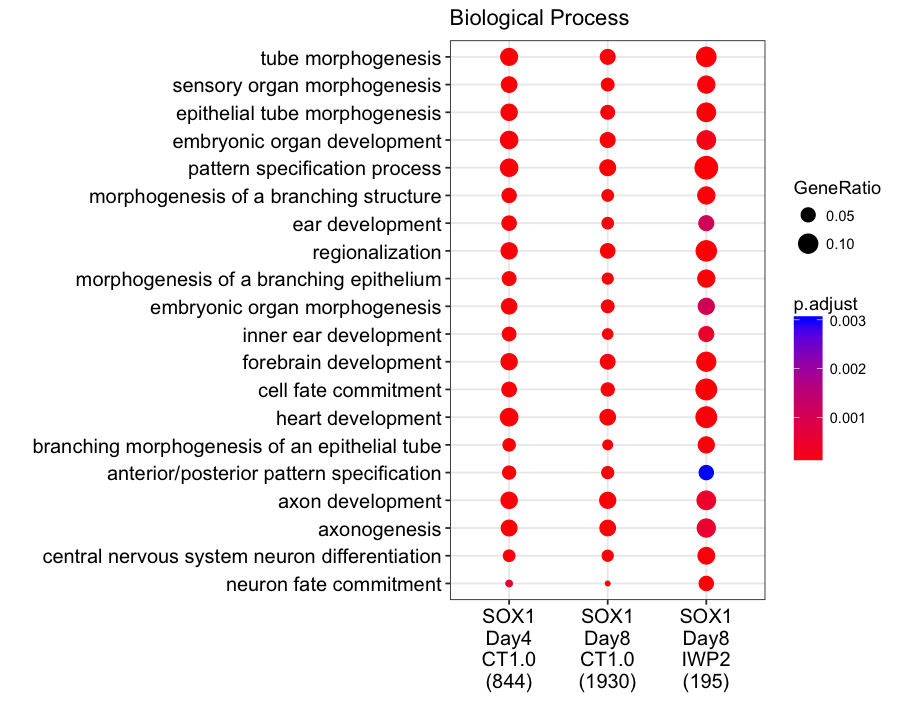

In [57]:
options(repr.plot.width=7.5, repr.plot.height=6)
p = plot(compBP, showCategory = 12, title = "Biological Process", font.size=12)
print(p)

In [58]:
pdf("./chipseeker_out/GeneOntology.BP.pdf", width = 7.5, height = 6)
print(p)
dev.off()
png("./chipseeker_out/GeneOntology.BP.png",
    width = 7.5, height = 6, units = 'in', res = 600)
print(p)
dev.off()

pdf 
  2

pdf 
  2

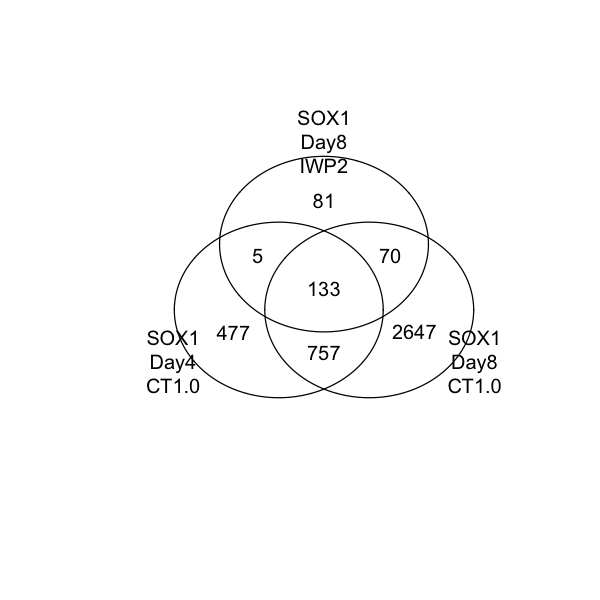

In [59]:
options(repr.plot.width=5, repr.plot.height=5)
genes= lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)
names(genes) = gsub("_", "\n", names(genes))
p = vennplot(genes,)


In [60]:
pdf("./chipseeker_out/venn.pdf", width = 5, height = 5)
vennplot(genes)
dev.off()
png("./chipseeker_out/venn.png", width = 5, height = 5, units = 'in', res = 600)
vennplot(genes)
dev.off()

pdf 
  2

pdf 
  2

In [24]:
p

NULL